## Work sheet for pseudo labeling 

In [46]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mask_functions import rle2mask
from glob import glob
import pydicom
import pred_util, pseudo_util
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
test_data_path = '/data/pneumo/dicom-images-test/'
test_data_list = test_data_path + '*/*/*.dcm'


In [50]:
len(glob(test_data_list))

1372

## predict test data
submission_util.make_submission(save=True) will do that!!

In [7]:
predict_test_data_list = glob('/data/pneumo_log/val_1/2019_0815_1742/submission/snapshot_model_2/*.npy')

In [19]:
data = np.load(predict_test_data_list[3])[()]

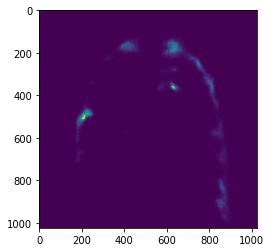

In [21]:
plt.imshow(data['pred_row'])

In [31]:
img_id = predict_test_data_list[3].split('/')[-1].split('.npy')[0]
glob('/data/pneumo/dicom-images-test/*/*/'+img_id + '*')[0]

'/data/pneumo/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.6165.1517875196.822621/1.2.276.0.7230010.3.1.3.8323329.6165.1517875196.822620/1.2.276.0.7230010.3.1.4.8323329.6165.1517875196.822622.dcm'

In [ ]:
pseudo_util.save_make_pseudo_data(pred_data_dir='/data/pneumo_log/val_1/2019_0815_1742/submission/best_weights/',
                          zero_max=0.005,
                          one_min=0.8, cpu_num=16, test_base_path='/data/pneumo/dicom-images-test/')

start to make pseudo label under /data/pneumo_log/val_1/2019_0815_1742/submission/best_weights//pseudo/




  0%|          | 0/1372 [00:00<?, ?it/s]

  0%|          | 1/1372 [00:00<07:28,  3.06it/s]

  0%|          | 5/1372 [00:00<05:23,  4.23it/s]

  1%|▏         | 19/1372 [00:00<03:48,  5.93it/s]

  2%|▏         | 32/1372 [00:00<02:41,  8.30it/s]

  3%|▎         | 39/1372 [00:00<02:05, 10.61it/s]

  4%|▍         | 52/1372 [00:01<01:30, 14.54it/s]

  4%|▍         | 60/1372 [00:01<01:09, 18.90it/s]

  5%|▌         | 70/1372 [00:01<00:52, 24.72it/s]

  6%|▌         | 78/1372 [00:01<00:42, 30.26it/s]

  6%|▋         | 87/1372 [00:01<00:34, 37.36it/s]

  7%|▋         | 95/1372 [00:01<00:29, 43.65it/s]

  8%|▊         | 107/1372 [00:01<00:24, 50.78it/s]

  8%|▊         | 115/1372 [00:01<00:25, 48.77it/s]

  9%|▉         | 130/1372 [00:02<00:20, 60.64it/s]

 10%|█         | 139/1372 [00:02<00:19, 61.72it/s]

 11%|█         | 148/1372 [00:02<00:21, 56.18it/s]

 12%|█▏        | 161/1372 [00:02<00:18, 64.21it/s]

 13%|█▎        | 172/1372 [00:02<00:16, 71.32it/s]

 13%|█▎        | 181/1372 [00:02<

In [54]:
# for fold 1 train data set
# before calling this, make predictions on fold 1 data
# the predictins should have been saved when the model was evaluated. with _save_preds()
pseudo_util.save_make_pseudo_data(pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights',
                          zero_max=0.005,
                          one_min=0.8, cpu_num=16, test_base_path='/data/pneumo/fold/1/', test_data=False)

start to make pseudo label under /data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/pseudo_train_fold/






  0%|          | 0/2135 [00:00<?, ?it/s]



  0%|          | 1/2135 [00:02<1:40:42,  2.83s/it]



  2%|▏         | 33/2135 [00:03<1:09:40,  1.99s/it]



  2%|▏         | 39/2135 [00:03<48:52,  1.40s/it]  



  2%|▏         | 42/2135 [00:05<39:37,  1.14s/it]



  3%|▎         | 70/2135 [00:06<27:48,  1.24it/s]



  3%|▎         | 72/2135 [00:07<23:22,  1.47it/s]



  4%|▎         | 80/2135 [00:07<17:17,  1.98it/s]



  4%|▍         | 89/2135 [00:08<12:11,  2.80it/s]



  5%|▍         | 105/2135 [00:09<09:04,  3.73it/s]



  5%|▌         | 114/2135 [00:09<07:01,  4.80it/s]



  6%|▌         | 118/2135 [00:09<05:14,  6.42it/s]



  6%|▌         | 121/2135 [00:10<07:08,  4.70it/s]



  7%|▋         | 142/2135 [00:11<05:13,  6.36it/s]



  7%|▋         | 145/2135 [00:11<04:04,  8.13it/s]



  7%|▋         | 150/2135 [00:12<04:30,  7.34it/s]



  7%|▋         | 155/2135 [00:13<05:05,  6.48it/s]



  8%|▊         | 172/2135 [00:13<03:37,  9.04it/s]



  8%|▊         | 177/2135 [00:13<02:5

In [58]:
data_path = glob('/data/pneumo_log/val_1/2019_0815_1742/submission/best_weights//pseudo/*.npy')
data_path2 = glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/pseudo_train_fold/*.npy')
print(len(data_path), len(data_path2))
np.load(data_path[0])[()]
np.load(data_path2[0])[()]

1362 2117


{'img': array([[ 37,  78,  68, ...,   5,   4,   2],
        [ 95, 152, 148, ...,   7,   6,   3],
        [ 79, 145, 145, ...,   8,   7,   5],
        ...,
        [ 25,  49,  63, ...,  69,  68,  38],
        [ 34,  58,  71, ...,  68,  69,  41],
        [ 13,  28,  32, ...,  35,  39,  15]], dtype=uint8),
 'mask': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}

In [61]:
a = [1, 2, 3] 
a +=[5, 6, 7]

In [62]:
a

[1, 2, 3, 5, 6, 7]